# Redes Neuronales Convolucionales (CNN)

- Obetivo: Conocer el tipo de capas de las CNN.

- Las redes convolucionales no solo se aplican a imágenes, también se pueden aplicar a caracteres o datos en el tiempo.

## Convolución

- La convolución es una operación matemática generalmente denotada como $*$, en la que una función se aplica otra función, dando como resultado la combinación de las dos funciones.

## Clasificar ropa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
K.clear_session()

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


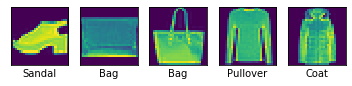

In [3]:
for i in range(5):
    rand_image_idx = np.random.randint(0, y_train.shape[0])
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand_image_idx])
    plt.xlabel(class_names[y_train[rand_image_idx]])
plt.show()

In [4]:
# escalar entre 0 y 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

print(x_train.shape) # (60000, 28, 28, 1)
print(x_test.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Obtener dimensiones

In [5]:
# con 1: no se cuenta la primera dimensión
x, y, channel = x_train.shape[1:]

input_shape = (x, y, channel)

## Crear modelo

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [7]:
epoch = 5
verbose = 1
batch = 50

## Capa de convolución


![Convolución](img/5.png)

- En general se utiliza la convolución 2D para el procesamiento de imagenes
- En tamaño del filtro es igual al ancho y largo de los campos receptivos
- Pooling reduce el número de parámetros

![Max Pooling](img/max.png)



![Avg Pooling](img/avg.png)

_Imágenes generadas con https://github.com/MartinThoma/LaTeX-examples_

In [8]:
num_filters = 20
filter_size = 3
pool_size = 3


- Diferente notación para crear modelo

In [9]:
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

## Compilar

In [10]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 13,010
Trainable params: 13,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.utils import plot_model

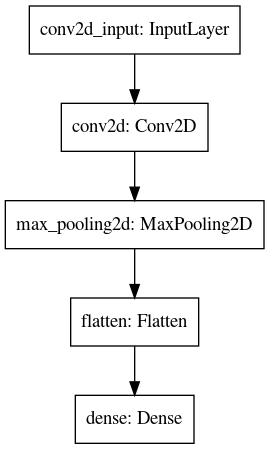

In [13]:
plot_model(model)

## Entrenamiento

In [14]:
history = model.fit(x_train, y_train,
  batch_size = batch,
  validation_split=0.3,
  epochs=epoch, verbose = verbose)

Epoch 1/5
840/840 [==============================] - 2s 3ms/step - loss: 0.6160 - accuracy: 0.7857 - val_loss: 0.4972 - val_accuracy: 0.8182
Epoch 2/5
840/840 [==============================] - 2s 2ms/step - loss: 0.4422 - accuracy: 0.8459 - val_loss: 0.4260 - val_accuracy: 0.8488
Epoch 3/5
840/840 [==============================] - 2s 2ms/step - loss: 0.4054 - accuracy: 0.8584 - val_loss: 0.3946 - val_accuracy: 0.8652
Epoch 4/5
840/840 [==============================] - 2s 2ms/step - loss: 0.3828 - accuracy: 0.8678 - val_loss: 0.3852 - val_accuracy: 0.8635
Epoch 5/5
840/840 [==============================] - 2s 3ms/step - loss: 0.3634 - accuracy: 0.8725 - val_loss: 0.3787 - val_accuracy: 0.8647


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.8626999855041504


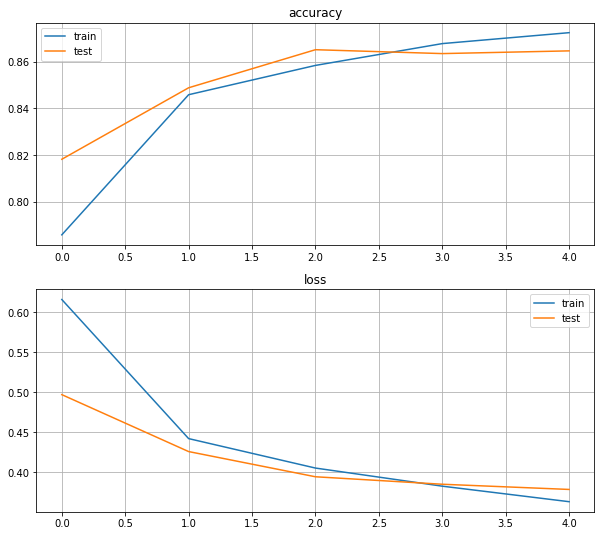

In [16]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## Diferente número de filtros
- Observar el número de parámetros y el efecto de los filtros y pooling en 'test accuracy' 

In [17]:
num_filters = 30
filter_size = 3
pool_size = 3

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
  batch_size = batch,
  validation_split=0.3,
  epochs=epoch, verbose = verbose)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                19210     
Total params: 19,510
Trainable params: 19,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
840/840 [==============================] - 2s 3ms/step - loss: 0.5705 - accuracy: 0.8058 - val_loss: 0.4445 - val_accuracy: 0.8414
Epoch 2/5
840/840 [==============================] - 2s 3ms/step - loss: 0.4097 - accuracy: 0.8581 - val_lo

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.871399998664856


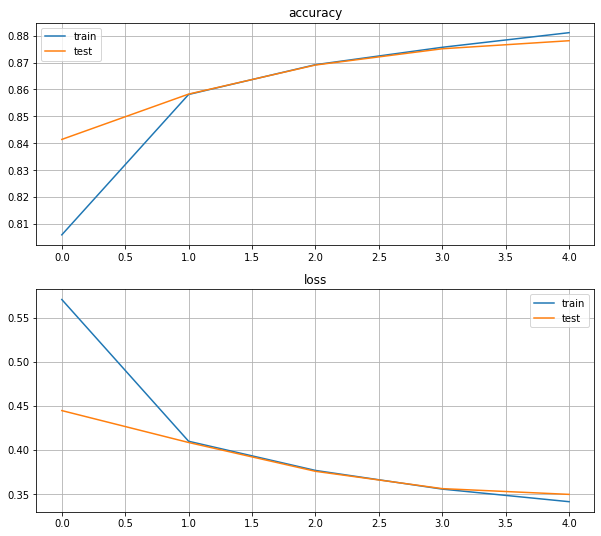

In [19]:
#plot
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()




plt.show()

## Strides y pooling
- Strides indica la unidad de desplazamiento del filtro. Si el valor es mayor a uno, los mapas de salida cuentan con un menor número de parámetros.


In [21]:
num_filters = 30
filter_size = 3


model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=input_shape, strides=2),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
  x_train, y_train,
  batch_size = batch,
  validation_split=0.3,
  epochs=epoch, verbose = verbose)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 30)        300       
_________________________________________________________________
flatten_2 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50710     
Total params: 51,010
Trainable params: 51,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
840/840 [==============================] - 2s 2ms/step - loss: 0.5653 - accuracy: 0.8016 - val_loss: 0.4677 - val_accuracy: 0.8344
Epoch 2/5
840/840 [==============================] - 2s 2ms/step - loss: 0.4540 - accuracy: 0.8423 - val_loss: 0.4484 - val_accuracy: 0.8432
Epoch 3/5
840/840 [==============================] - 2s 2ms/step - loss: 0.4332 - accuracy: 0.8490

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.8367000222206116


## DIferente tamaño de pooling
- Se obtiene el mismo número de parámetros con strides=2 y sin capa pooling

In [23]:
num_filters = 30
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
  x_train, y_train,
  batch_size = batch,
  validation_split=0.3,
  epochs=epoch, verbose = verbose)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50710     
Total params: 51,010
Trainable params: 51,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
840/840 [==============================] - 3s 3ms/step - loss: 0.5130 - accuracy: 0.8250 - val_loss: 0.4020 - val_accuracy: 0.8603
Epoch 2/5
840/840 [==============================] - 2s 3ms/step - loss: 0.3769 - accuracy: 0.8702 - val_lo

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.8824999928474426


# Probar predicciones del modelo
- 'argmax' retorna el elemento de mayor valor

In [25]:
# Primeras 5 imagenes de test
predictions = model.predict(x_test[:5])

print(np.argmax(predictions, axis=1)) 
p = np.argmax(predictions, axis=1)

print(y_test[:5])

[9 2 1 1 6]
[9 2 1 1 6]


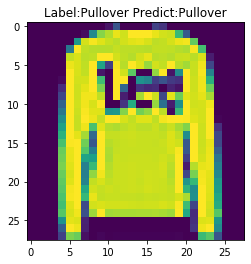

In [26]:
plt.imshow(np.squeeze(x_test[1]))
plt.title('Label:' + class_names[int(y_test[1])] 
          + ' Predict:'+  class_names[int(p[1])])
plt.show()

- Mejorar la arquitectura
- Probar con otro dataset